In [1]:
import numpy as np
data = {'name': [1,np.nan,"AAA",4,"BBB",5,6],
        'weight': [80,7,45,70,50,np.nan,72],
        'age': [50,52,12,24,18,11,35]}
data

{'name': [1, nan, 'AAA', 4, 'BBB', 5, 6],
 'weight': [80, 7, 45, 70, 50, nan, 72],
 'age': [50, 52, 12, 24, 18, 11, 35]}

,name,weight,age
0,1,80.0,50
1,NaN,7.0,52
2,AAA,45.0,12
3,4,70.0,24
4,BBB,50.0,18
5,5,NaN,11
6,6,72.0,35


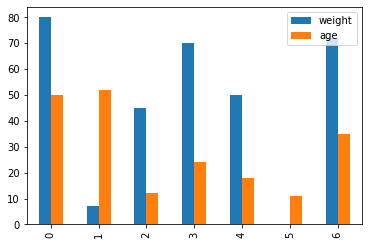

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)
df.plot(kind="bar")
df

In [3]:
df_dropped = df.dropna()
df_dropped

,name,weight,age
0,1,80.0,50
2,AAA,45.0,12
3,4,70.0,24
4,BBB,50.0,18
6,6,72.0,35


In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[["weight"]])
df['weight'] = imputer.transform(df[['weight']])
df

,name,weight,age
0,1,80.0,50
1,NaN,7.0,52
2,AAA,45.0,12
3,4,70.0,24
4,BBB,50.0,18
5,5,54.0,11
6,6,72.0,35


In [5]:
data_mean, data_std = np.mean(df), np.std(df)
data_mean-3*data_std

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


weight   -13.673586
age      -18.777950
dtype: float64

In [6]:
q25, q75 = np.percentile(df[["weight"]], 25), np.percentile(df[["weight"]], 75)
iqr = q75 - q25

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

print("lower bound: ",lower, "upper bound: ",upper)

lower bound:  12.25 upper bound:  106.25


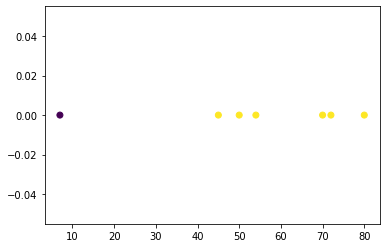

In [7]:
from sklearn import svm
X = df[["weight"]]
#x_scaled = StandardScaler().fit_transform(X)
x_scaled = X
out = svm.OneClassSVM(kernel="linear", gamma="auto", nu=0.1).fit(x_scaled)
plt.scatter(x_scaled,np.zeros([7]),c=out.predict(x_scaled))


In [8]:
from sklearn import preprocessing
X = df[["weight", "age"]]
x_scaled = preprocessing.StandardScaler().fit_transform(X) #Normalization
x_scaled


array([[ 1.15259149,  1.33155134],
       [-2.08353078,  1.4575089 ],
       [-0.39897398, -1.06164229],
       [ 0.70928707, -0.30589693],
       [-0.17732177, -0.68376961],
       [ 0.        , -1.12462107],
       [ 0.79794796,  0.38686965]])

In [9]:
X = df[["weight", "age"]]
x_scaled = 0.1+(0.9-0.1)*preprocessing.MinMaxScaler().fit_transform(X) #Standardization aka MinMax Scaler
x_scaled


array([[0.9       , 0.86097561],
       [0.1       , 0.9       ],
       [0.51643836, 0.1195122 ],
       [0.79041096, 0.35365854],
       [0.57123288, 0.23658537],
       [0.61506849, 0.1       ],
       [0.81232877, 0.56829268]])